In [77]:
%load_ext autoreload
%autoreload 2

In [79]:
import pandas as pd
import functools
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.utils import resample

%matplotlib inline

ModuleNotFoundError: No module named 'boostrap_decorator'

In [2]:
data = load_iris()
X = data['data']
y = data['target']

In [65]:
def bootstrap(*,n=100):
    def inner(func):
        @functools.wraps(func)
        def wrapper(*args, **kwargs):
            result = [func(*resample(*args), **kwargs) for _ in range(n)]
            return result
        return wrapper
    return inner

In [75]:
@bootstrap(n=200)
def my_model(X, y, clf=KNeighborsClassifier):
    X_train, X_test, y_train, y_test = train_test_split(X, y)
    clf = clf()
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    return accuracy_score(y_test, y_pred)

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


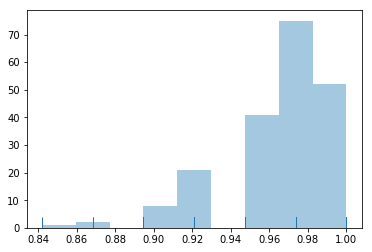

In [76]:
result = my_model(X, y, clf=KNeighborsClassifier)
sns.distplot(result, kde=False, rug=True)